In [1]:
rm -r /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/*.with_genes.txt

In [3]:
!ls /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all

mmTreg.Bulk.00hr_vs_mmTh0.Bulk.00hr.txt
mmTreg.Bulk.02hr_vs_mmTh0.Bulk.02hr.txt
mmTreg.Bulk.16hr_vs_mmTh0.Bulk.16hr.txt
mmTreg.Bulk.24hr_vs_mmTh0.Bulk.24hr.txt
mmTreg.Bulk.48hr_vs_mmTh0.Bulk.48hr.txt
mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr.txt
Th17.Bulk.00hr_vs_mmTh0.Bulk.00hr.txt
Th17.Bulk.02hr_vs_mmTh0.Bulk.02hr.txt
Th17.Bulk.16hr_vs_mmTh0.Bulk.16hr.txt
Th17.Bulk.24hr_vs_mmTh0.Bulk.24hr.txt
Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr.txt
Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr.txt
Th1.Bulk.00hr_vs_mmTh0.Bulk.00hr.txt
Th1.Bulk.02hr_vs_mmTh0.Bulk.02hr.txt
Th1.Bulk.16hr_vs_mmTh0.Bulk.16hr.txt
Th1.Bulk.24hr_vs_mmTh0.Bulk.24hr.txt
Th1.Bulk.48hr_vs_mmTh0.Bulk.48hr.txt
Th1.Sorted.72hr_vs_mmTh0.Sorted.72hr.txt
Th2.Bulk.00hr_vs_mmTh0.Bulk.00hr.txt
Th2.Bulk.02hr_vs_mmTh0.Bulk.02hr.txt
Th2.Bulk.16hr_vs_mmTh0.Bulk.16hr.txt
Th2.Bulk.24hr_vs_mmTh0.Bulk.24hr.txt
Th2.Bulk.48hr_vs_mmTh0.Bulk.48hr.txt
Th2.Sorted.72hr_vs_mmTh0.Sorted.72hr.txt
W1


In [3]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/plots

In [4]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
cd /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/
for ii in $(/bin/ls -1 *_vs_*hr.txt | /bin/grep -v with_genes);
do
    python /data/reddylab/Alex/collab/20180628_Layden/processing/rna_seq/scripts/mm10.rnaseq_dge_deseq2.add_gene_names.py \
        ${ii} \
        ${ii/.txt/.with_genes.txt}
done

In [1]:
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Config
pval_thres = 0.01
top_to_report = 30

special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
comparisons = [
     'Th1.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'Th1.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'Th1.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'Th1.Bulk.24hr_vs_mmTh0.Bulk.24hr',
     'Th1.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'Th1.Sorted.72hr_vs_mmTh0.Sorted.72hr',
     'Th2.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'Th2.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'Th2.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'Th2.Bulk.24hr_vs_mmTh0.Bulk.24hr',
     'Th2.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'Th2.Sorted.72hr_vs_mmTh0.Sorted.72hr',
     'Th17.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'Th17.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'Th17.Bulk.16hr_vs_mmTh0.Bulk.16hr', 
     'Th17.Bulk.24hr_vs_mmTh0.Bulk.24hr',  
     'Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr',
     'mmTreg.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'mmTreg.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'mmTreg.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'mmTreg.Bulk.24hr_vs_mmTh0.Bulk.24hr', 
     'mmTreg.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr'
]

data_dir = '/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all'

for comparison in comparisons:
    df = pd.read_csv("%s/%s.with_genes.txt" % (data_dir, comparison),
                    sep="\t")
#     df_gene_name_type = pd.read_csv("/data/reddylab/Reference_Data/Refseq/GRCh38/GRCh38_latest_genomic.gene_name_gene_type.txt",
#                     sep="\t",
#                     names=['GeneName', 'GeneType'])
#     df = df.merge(df_gene_name_type, on='GeneName')
#     pseudogene_types = set(df.loc[["pseudogene" in gt for gt in df['GeneType'].values], 'GeneType'].values)
#     df = df[~df.GeneType.isin(pseudogene_types)]
#     df = df[df.GeneType.isin(['protein_coding'])]
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(1, 1, 1)
    df_non_sig = df[~(df.padj<pval_thres) & (~df.GeneName.isin(special_genes))]
    ax.set_xscale('log')
    ax.plot(df_non_sig['baseMean'].values, 
            df_non_sig['log2FoldChange'].values,'o', color='darkgrey', label='non-sig. DEGs', markersize=5)

    
    ylims = [np.ceil(df['log2FoldChange'].min()-1), 
             np.floor(df['log2FoldChange'].max()+1)]
    df_sig = df[df.padj<=pval_thres]
    ax.plot(df_sig['baseMean'].values, df_sig['log2FoldChange'].values,'ro', alpha=0.6, label='sig. DEGs', markersize=5)

    # Annotate the top top_to_report
    df_annotate = df_sig.sort_values(by='padj', ascending=True).head(top_to_report)
    df_annotate_table = df_sig.sort_values(by='padj', ascending=True)

#     if np.count_nonzero(df_annotate['log2FoldChange']>0)==0:
#         df_annotate = pd.concat([df_annotate.head(top_to_report-10), df_sig[df_sig['log2FoldChange']>0].head(10)])
#     ax.plot(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, 'ro', label='sig. DEGs')

#     for x, y, t in zip(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, df_annotate['GeneName'].values) :
#         ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
#                     textcoords='offset points')

    # Annotate in particular IL1RN, HBG and EP300
    df_annotate_selected = df[df.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue', 
            marker='.', linestyle = 'None', alpha=1, label='interest genes', markersize=5)
    for x, y, t in zip(df_annotate_selected['baseMean'].values,
                       df_annotate_selected['log2FoldChange'].values, 
                       df_annotate_selected['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')
    df_annotate_selected = df_sig[df_sig.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue',
            marker='o', linestyle = 'None', alpha=1, label='interest sig. DEGs', markersize=5)
    
    

    plt.ylim(ylims)
    plt.xlabel("mean of normalized counts")
    plt.ylabel("log2 fold-change")
    plt.title("%s\n%d genes diff. expressed (padj<=%.3f) - top %d annotated" % (comparison, 
                                                                                np.count_nonzero(df.padj<=pval_thres), 
                                                                                pval_thres, 
                                                                                top_to_report))
    plt.hlines(0, 0, 1e6, color='#ffcc80', linewidth =2 )
    plt.legend()

    # Remove spines and tight the layout
    simpleaxis(ax)
    plt.tight_layout()
    
#     # Save annotated MA plot
    plt.savefig("/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/plots/%s.with_genes.annotated_plot_MA.png" % comparison)
    plt.savefig("/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/plots/%s.with_genes.annotated_plot_MA.pdf" % comparison)
     # Save annotated genes without pseudogenes
    df_annotate_table.to_csv("/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/%s.with_genes.sig_DE.txt" % comparison,
                       sep='\t',
                       index=False)
    
    # print table of values 
#     print ("======", comparison, "======")
#     display(df_annotate) 



/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [16]:
%%writefile /data/reddylab/Revathy/collabs/Keith/Tcell/scripts/ruvseq.R
#!/usr/bin/env Rscript

suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(matrixStats))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(RUVSeq))
suppressPackageStartupMessages(library(EDASeq))

### countData

countData_time_00 <- read.csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Tcell_timepoint_00.count.txt', sep='\t')
countData_time_00 <- countData_time_00[,-1]
rownames(countData_time_00) <- countData_time_00[,1]
countData_time_00[,1] <- NULL
countData_time_00 <- as.matrix(subset(countData_time_00))

### colData

col1_colData_00 <- as.vector(colnames(countData_time_00))
cond_colData_00 <- gsub('(.*)\\..*', '\\1', col1_colData_00)
rep_colData_00 <- gsub('.*\\.(.*)','\\1',col1_colData_00)

colData_time_00 <- data.frame(condition = cond_colData_00,
                     rep = rep_colData_00, stringsAsFactors = TRUE)


rownames(colData_time_00) <- col1_colData_00


## create expression set for RUVSeq

set_time_00 <- newSeqExpressionSet(counts=countData_time_00,
                           phenoData = colData_time_00)
idx_time_00  <- rowSums(counts(set_time_00) > 5) >= 2
set_time_00 <- set_time_00[idx_time_00, ]

differences <- makeGroups(colData_time_00$condition)

set_00 <- RUVs(set_time_00, unique(rownames(set_time_00)), k=4, differences)
ruv_colData_time_00 <- pData(set_00)
ruv_colData_time_00$names <- rownames(ruv_colData_time_00)


### countData for all Tcell subtypes

countData_Tcell <- read.csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Th1_Th2_Th17_Treg_Th0.counts.txt', sep='\t')
countData_Tcell <- countData_Tcell[,-1]
rownames(countData_Tcell) <- countData_Tcell[,1]
countData_Tcell[,1] <- NULL
countData_Tcell <- as.matrix(subset(countData_Tcell))

### colData for all Tcell subtypes

col1_colData_Tcell <- as.vector(colnames(countData_Tcell))
cond_colData_Tcell <- gsub('(.*)\\..*', '\\1', col1_colData_Tcell)
rep_colData_Tcell <- gsub('.*\\.(.*)','\\1',col1_colData_Tcell)

colData_Tcell <- data.frame(condition = cond_colData_Tcell,
                     rep = rep_colData_Tcell, stringsAsFactors = TRUE)

rownames(colData_Tcell) <- col1_colData_Tcell


new_colData <- ruv_colData_time_00

### DESeq matrix

dds <- DESeqDataSetFromMatrix(countData = countData_for_00, 
                                 colData = new_colData, 
                                 design = ~ W_1 + W_2 + rep + condition)

references <- c('00hr','02hr','16hr','24hr','48hr')
for (ref in references) {
    dds$condition <- relevel(dds$condition, ref = paste0('mmTh0.Bulk.',ref))
    dds <- dds[ rowSums(fpm(dds, robust = FALSE)>=2) > 15, ]
    dds <- estimateSizeFactors(dds)
    dds <- estimateDispersions(dds, fitType='local')
    dds <- nbinomWaldTest(dds, maxit=100000)
    
    ##th2
    result_th2 <- results(dds, contrast = c('condition',paste0('KS88.Th2.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_th2 <- result_th2[order(result_th2$padj),]
    result_th2 <- lfcShrink(dds, coef=paste0('condition_KS88.Th2.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_th2, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/Th2.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
    
    ##th17
    result_th17 <- results(dds, contrast = c('condition',paste0('Th17.Bulk.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_th17 <- result_th17[order(result_th17$padj),]
    result_th17 <- lfcShrink(dds, coef=paste0('condition_Th17.Bulk.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_th17, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/Th17.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
    
    ##treg
    result_treg <- results(dds, contrast = c('condition',paste0('mmTreg.Bulk.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_treg <- result_treg[order(result_treg$padj),]
    result_treg <- lfcShrink(dds, coef=paste0('condition_mmTreg.Bulk.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_treg, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/mmTreg.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
    
    ##th1
    result_th1 <- results(dds, contrast = c('condition',paste0('KS191.Th1.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_th1 <- result_th1[order(result_th1$padj),]
    result_th1 <- lfcShrink(dds, coef=paste0('condition_KS191.Th1.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_th1, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/Th1.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
}


Overwriting /data/reddylab/Revathy/collabs/Keith/Tcell/scripts/ruvseq.R


In [17]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch -p all \
    --mem 64G \
    -o /data/reddylab/Revathy/collabs/Keith/Tcell/logs/ruvseq.out \
    <<'EOF'
#!/bin/bash
Rscript /data/reddylab/Revathy/collabs/Keith/Tcell/scripts/ruvseq.R 
    
EOF

Submitted batch job 26790663


In [6]:
%%writefile /data/reddylab/Revathy/collabs/Keith/Tcell/scripts/deseq_after_scaling.R
#!/usr/bin/env Rscript

suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(matrixStats))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(RUVSeq))
suppressPackageStartupMessages(library(EDASeq))

### countTable after scaling 

scaled_countData <- read.csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/ruvseq_corrected_countTable_v1.txt', sep='\t')
rownames(scaled_countData) <- scaled_countData[,1]
scaled_countData[,1] <- NULL
scaled_countData <- ceiling(scaled_countData)
scaled_countData <- as.matrix(subset(scaled_countData))
scaled_countData[scaled_countData < 0] <- 0
scaled_countData <- scaled_countData[rowSums(scaled_countData[])>0,]
scaled_countData <- scaled_countData+1


### colData

col1_colData <- as.vector(colnames(scaled_countData))
cond_colData <- gsub('(.*)\\..*', '\\1', col1_colData)
rep_colData <- gsub('.*\\.(.*)','\\1',col1_colData)


colData <- data.frame(condition = cond_colData,
                     rep = rep_colData, stringsAsFactors = TRUE)

rownames(colData) <- col1_colData

### DESeq analysis

dds <- DESeqDataSetFromMatrix(countData = scaled_countData, 
                                 colData = colData, 
                                 design = ~ rep + condition)

references <- c('00hr','02hr','16hr','24hr','48hr')
for (ref in references) {
    dds$condition <- relevel(dds$condition, ref = paste0('mmTh0.Bulk.',ref))
    dds <- dds[ rowSums(fpm(dds, robust = FALSE)>=2) > 15, ]
    dds <- estimateSizeFactors(dds)
    dds <- estimateDispersions(dds, fitType='local')
    dds <- nbinomWaldTest(dds, maxit=100000)
    
    ##th2
    result_th2 <- results(dds, contrast = c('condition',paste0('KS88.Th2.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_th2 <- result_th2[order(result_th2$padj),]
    result_th2 <- lfcShrink(dds, coef=paste0('condition_KS88.Th2.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_th2, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/W1/Th2.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
    
    ##th17
    result_th17 <- results(dds, contrast = c('condition',paste0('Th17.Bulk.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_th17 <- result_th17[order(result_th17$padj),]
    result_th17 <- lfcShrink(dds, coef=paste0('condition_Th17.Bulk.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_th17, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/W1/Th17.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
    
    ##treg
    result_treg <- results(dds, contrast = c('condition',paste0('mmTreg.Bulk.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_treg <- result_treg[order(result_treg$padj),]
    result_treg <- lfcShrink(dds, coef=paste0('condition_mmTreg.Bulk.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_treg, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/W1/mmTreg.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
    
    ##th1
    result_th1 <- results(dds, contrast = c('condition',paste0('KS191.Th1.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_th1 <- result_th1[order(result_th1$padj),]
    result_th1 <- lfcShrink(dds, coef=paste0('condition_KS191.Th1.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_th1, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/W1/Th1.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
}


Overwriting /data/reddylab/Revathy/collabs/Keith/Tcell/scripts/deseq_after_scaling.R


In [7]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch -p all \
    --mem 64G \
    -o /data/reddylab/Revathy/collabs/Keith/Tcell/logs/deseq_after_scaling.out \
    <<'EOF'
#!/bin/bash
Rscript /data/reddylab/Revathy/collabs/Keith/Tcell/scripts/deseq_after_scaling.R
    
EOF

Submitted batch job 26807907


## DESeq on all Tcell subtypes without RUVSeq but adding 'day' as another covariate

In [3]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day

In [6]:
%%writefile /data/reddylab/Revathy/collabs/Keith/Tcell/scripts/DESeq_with_day.R
#!/usr/bin/env Rscript

suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(matrixStats))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(RUVSeq))
suppressPackageStartupMessages(library(EDASeq))

### countData for all Tcell subtypes

countData_Tcell <- read.csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Th1_Th2_Th17_Treg_Th0.counts.txt', sep='\t')
countData_Tcell <- countData_Tcell[,-1]
rownames(countData_Tcell) <- countData_Tcell[,1]
countData_Tcell[,1] <- NULL
countData_Tcell <- as.matrix(subset(countData_Tcell))

### colData for all Tcell subtypes

col1_colData_Tcell <- as.vector(colnames(countData_Tcell))
cond_colData_Tcell <- gsub('(.*)\\..*', '\\1', col1_colData_Tcell)
rep_colData_Tcell <- gsub('.*\\.(.*)','\\1',col1_colData_Tcell)
day_colData_Tcell <- c(rep('day1',3),rep('day4',3),rep('day3',4),rep('day2',4),rep('day1',3),
                       rep('day1',4),rep('day4',3),rep('day3',4),rep('day2',4),rep('day1',3),
                       rep('day1',4),rep('day4',3),rep('day3',4),rep('day2',4),rep('day1',4),
                       rep('day1',4),rep('day4',3),rep('day3',4),rep('day2',4),rep('day1',4),
                       rep('day1',4),rep('day4',3),rep('day3',4),rep('day2',4),rep('day1',4),
                       rep('day1',3),rep('day4',3),rep('day3',4),rep('day2',4),rep('day1',4))


colData_Tcell <- data.frame(condition = cond_colData_Tcell,
                     rep = rep_colData_Tcell, day = day_colData_Tcell, stringsAsFactors = TRUE)

rownames(colData_Tcell) <- col1_colData_Tcell


### DESeq matrix

dds <- DESeqDataSetFromMatrix(countData = countData_Tcell, 
                                 colData = colData_Tcell, 
                                 design = ~ day + rep + condition)

references <- c('00hr','02hr','16hr','24hr','48hr')
for (ref in references) {
    dds$condition <- relevel(dds$condition, ref = paste0('mmTh0.Bulk.',ref))
    dds <- dds[ rowSums(fpm(dds, robust = FALSE)>=2) > 15, ]
    dds <- estimateSizeFactors(dds)
    dds <- estimateDispersions(dds, fitType='local')
    dds <- nbinomWaldTest(dds, maxit=100000)
    
    ##th2
    result_th2 <- results(dds, contrast = c('condition',paste0('KS88.Th2.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_th2 <- result_th2[order(result_th2$padj),]
    result_th2 <- lfcShrink(dds, coef=paste0('condition_KS88.Th2.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_th2, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/Th2.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
    
    ##th17
    result_th17 <- results(dds, contrast = c('condition',paste0('Th17.Bulk.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_th17 <- result_th17[order(result_th17$padj),]
    result_th17 <- lfcShrink(dds, coef=paste0('condition_Th17.Bulk.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_th17, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/Th17.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
    
    ##treg
    result_treg <- results(dds, contrast = c('condition',paste0('mmTreg.Bulk.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_treg <- result_treg[order(result_treg$padj),]
    result_treg <- lfcShrink(dds, coef=paste0('condition_mmTreg.Bulk.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_treg, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/mmTreg.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
    
    ##th1
    result_th1 <- results(dds, contrast = c('condition',paste0('KS191.Th1.',ref),paste0('mmTh0.Bulk.',ref)), alpha = 0.05)
    result_th1 <- result_th1[order(result_th1$padj),]
    result_th1 <- lfcShrink(dds, coef=paste0('condition_KS191.Th1.',ref,'_vs_mmTh0.Bulk.',ref), type='ashr') 
    write.table(result_th1, file=paste0('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/Th1.Bulk.',ref,'_vs_mmTh0.Bulk.',ref,'.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')
}

dds$condition <- relevel(dds$condition, ref = 'mmTh0.Sorted.72hr')
dds <- dds[ rowSums(fpm(dds, robust = FALSE)>=2) > 15, ]
dds <- estimateSizeFactors(dds)
dds <- estimateDispersions(dds, fitType='local')
dds <- nbinomWaldTest(dds, maxit=100000)


result_th1_72 <- results(dds, contrast = c('condition','KS191.Th1.72hr.Sorted','mmTh0.Sorted.72hr'), alpha = 0.05)
result_th1_72 <- result_th1_72[order(result_th1_72$padj),]
result_th1_72 <- lfcShrink(dds, coef=paste0('condition_KS191.Th1.72hr.Sorted_vs_mmTh0.Sorted.72hr'), type='ashr')
write.table(result_th1_72, file='/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/Th1.Sorted.72hr_vs_mmTh0.Sorted.72hr.txt', quote = FALSE, row.names=TRUE, sep = '\t')

result_th2_72 <- results(dds, contrast = c('condition','KS88.Th2.72hr.Sort','mmTh0.Sorted.72hr'), alpha = 0.05)
result_th2_72 <- result_th2[order(result_th2_72$padj),]
result_th2_72 <- lfcShrink(dds, coef=paste0('condition_KS88.Th2.72hr.Sort_vs_mmTh0.Sorted.72hr'), type='ashr')
write.table(result_th2_72, file='/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/Th2.Sorted.72hr_vs_mmTh0.Sorted.72hr.txt', quote = FALSE, row.names=TRUE, sep = '\t')

result_th17_72 <- results(dds, contrast = c('condition','Th17.Sorted.72hr','mmTh0.Sorted.72hr'), alpha = 0.05)
result_th17_72 <- result_th17_72[order(result_th17_72$padj),]
result_th17_72 <- lfcShrink(dds, coef=paste0('condition_Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr'), type='ashr')
write.table(result_th17_72, file='/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr.txt', quote = FALSE, row.names=TRUE, sep = '\t')

result_treg_72 <- results(dds, contrast = c('condition','mmTreg.Sorted.72hr','mmTh0.Sorted.72hr'), alpha = 0.05)
result_treg_72 <- result_treg_72[order(result_treg_72$padj),]
result_treg_72 <- lfcShrink(dds, coef=paste0('condition_mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr'), type='ashr')
write.table(result_treg_72, file='/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr.txt', quote = FALSE, row.names=TRUE, sep = '\t')



Overwriting /data/reddylab/Revathy/collabs/Keith/Tcell/scripts/DESeq_with_day.R


In [7]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch -p all \
    --mem 64G \
    -o /data/reddylab/Revathy/collabs/Keith/Tcell/logs/deseq_with_day.out \
    <<'EOF'
#!/bin/bash
Rscript /data/reddylab/Revathy/collabs/Keith/Tcell/scripts/DESeq_with_day.R
    
EOF

Submitted batch job 27052757


## DESeq after RUVSeq when each of the Tcell subtype comparison is taken separately
#### Th2 results

In [20]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
cd /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual
for ii in $(/bin/ls -1 *_vs_*hr.txt | /bin/grep -v with_genes);
do
    python /data/reddylab/Alex/collab/20180628_Layden/processing/rna_seq/scripts/mm10.rnaseq_dge_deseq2.add_gene_names.py \
        ${ii} \
        ${ii/.txt/.with_genes.txt}
done

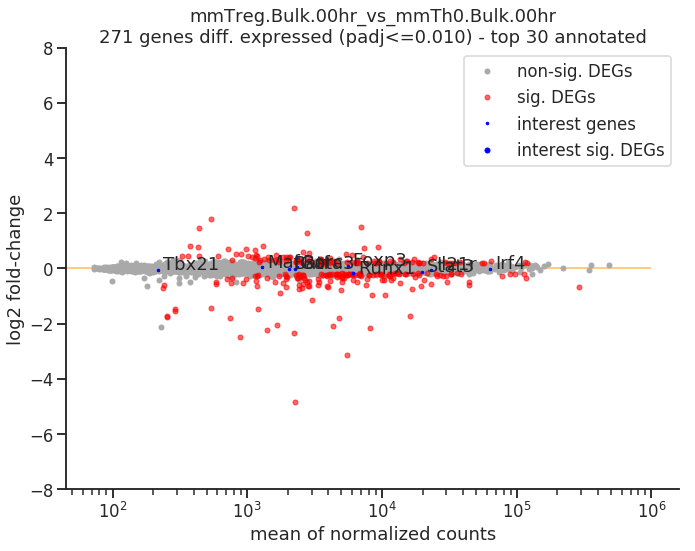

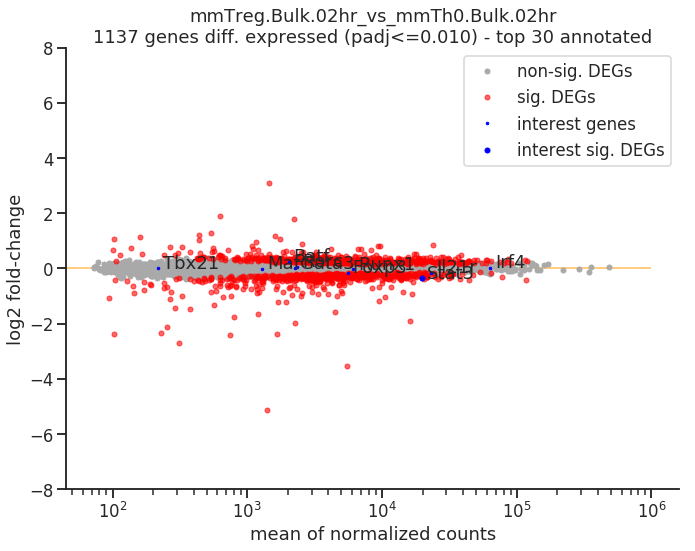

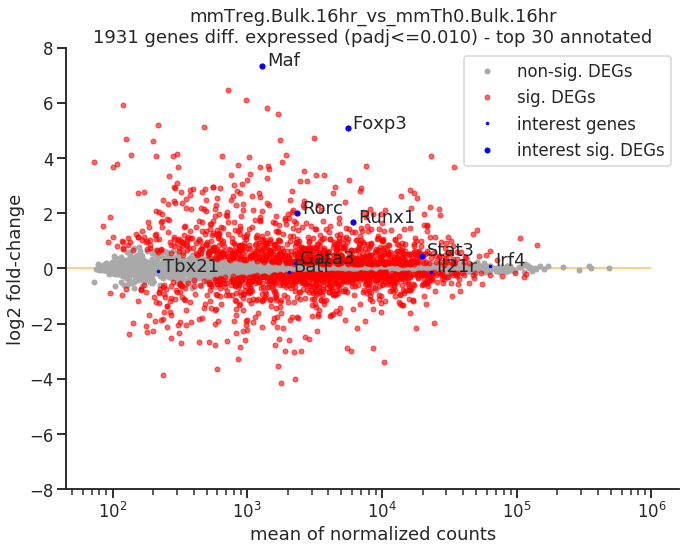

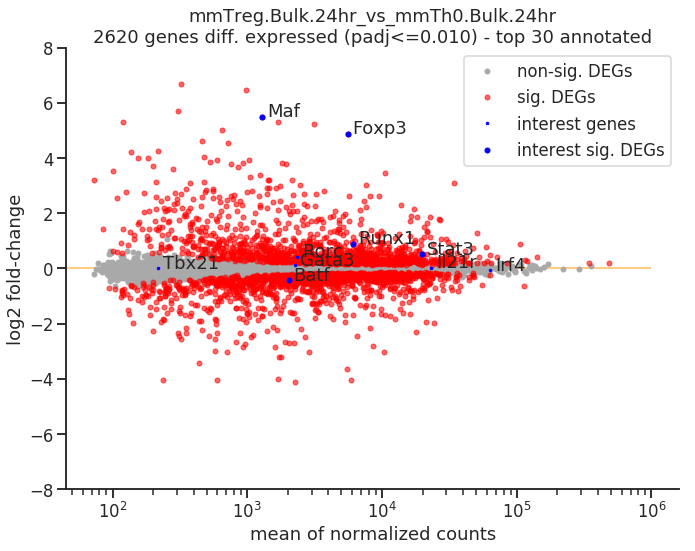

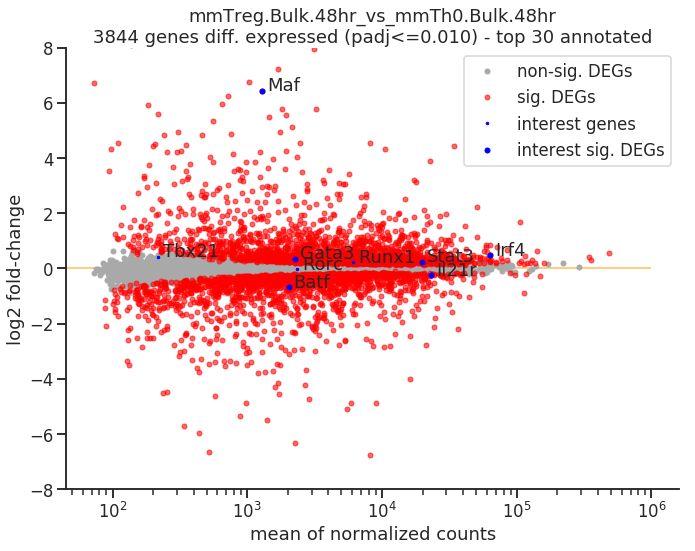

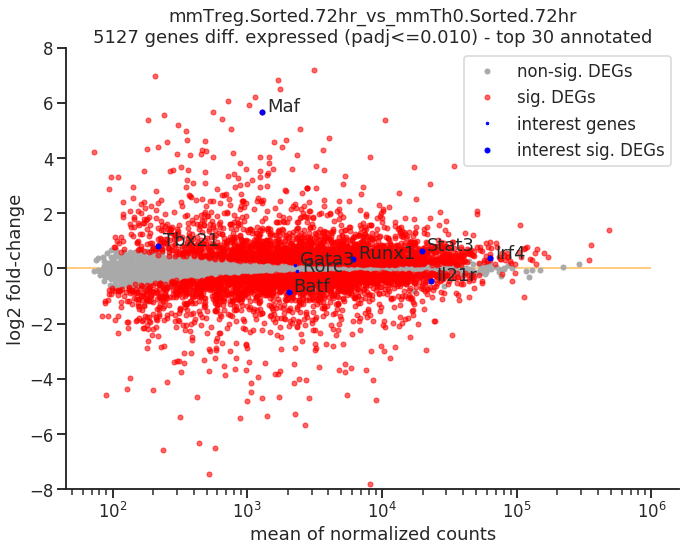

In [23]:
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Config
pval_thres = 0.01
logfc_thres = 1
top_to_report = 30

special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3', 'Gata3']
comparisons = [
     'mmTreg.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'mmTreg.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'mmTreg.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'mmTreg.Bulk.24hr_vs_mmTh0.Bulk.24hr',
     'mmTreg.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr'
]

data_dir = '/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual'

for comparison in comparisons:
    df = pd.read_csv("%s/%s.with_genes.txt" % (data_dir, comparison),
                    sep="\t")
#     df_gene_name_type = pd.read_csv("/data/reddylab/Reference_Data/Refseq/GRCh38/GRCh38_latest_genomic.gene_name_gene_type.txt",
#                     sep="\t",
#                     names=['GeneName', 'GeneType'])
#     df = df.merge(df_gene_name_type, on='GeneName')
#     pseudogene_types = set(df.loc[["pseudogene" in gt for gt in df['GeneType'].values], 'GeneType'].values)
#     df = df[~df.GeneType.isin(pseudogene_types)]
#     df = df[df.GeneType.isin(['protein_coding'])]
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(1, 1, 1)
    df_non_sig = df[~(df.padj<pval_thres) & (~df.GeneName.isin(special_genes))]

    ax.set_xscale('log')
    ax.plot(df_non_sig['baseMean'].values, 
            df_non_sig['log2FoldChange'].values,'o', color='darkgrey', label='non-sig. DEGs', markersize=5)

    
#     ylims = [np.ceil(df['log2FoldChange'].min()-1), 
#              np.floor(df['log2FoldChange'].max()+1)]
    df_sig = df[df.padj<=pval_thres]
    ax.plot(df_sig['baseMean'].values, df_sig['log2FoldChange'].values,'ro', alpha=0.6, label='sig. DEGs', markersize=5)

    # Annotate the top top_to_report
    df_annotate = df_sig.sort_values(by='padj', ascending=True).head(top_to_report)
    df_annotate_table = df_sig.sort_values(by='padj', ascending=True)

#     if np.count_nonzero(df_annotate['log2FoldChange']>0)==0:
#         df_annotate = pd.concat([df_annotate.head(top_to_report-10), df_sig[df_sig['log2FoldChange']>0].head(10)])
#     ax.plot(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, 'ro', label='sig. DEGs')

#     for x, y, t in zip(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, df_annotate['GeneName'].values) :
#         ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
#                     textcoords='offset points')

    # Annotate in particular IL1RN, HBG and EP300
    df_annotate_selected = df[df.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue', 
            marker='.', linestyle = 'None', alpha=1, label='interest genes', markersize=5)
    for x, y, t in zip(df_annotate_selected['baseMean'].values,
                       df_annotate_selected['log2FoldChange'].values, 
                       df_annotate_selected['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')
    df_annotate_selected = df_sig[df_sig.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue',
            marker='o', linestyle = 'None', alpha=1, label='interest sig. DEGs', markersize=5)
    
    

    plt.ylim(-8,8)
    plt.xlabel("mean of normalized counts")
    plt.ylabel("log2 fold-change")
    plt.title("%s\n%d genes diff. expressed (padj<=%.3f) - top %d annotated" % (comparison, 
                                                                                np.count_nonzero(df.padj<=pval_thres), 
                                                                                pval_thres, 
                                                                                top_to_report))
    plt.hlines(0, 0, 1e6, color='#ffcc80', linewidth =2 )
    plt.legend()

    # Remove spines and tight the layout
    simpleaxis(ax)
    plt.tight_layout()
    
#     # Save annotated MA plot
   # plt.savefig("/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/%s.with_genes.annotated_plot_MA.png" % comparison)
    plt.savefig("/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual/%s.with_genes.annotated_plot_MA.pdf" % comparison)
     # Save annotated genes without pseudogenes
    df_annotate_table.to_csv("/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual/%s.with_genes.sig_DE.txt" % comparison,
                       sep='\t',
                       index=False)
    plt.show()
    
    # print table of values 
#     print ("======", comparison, "======")
#     display(df_annotate) 



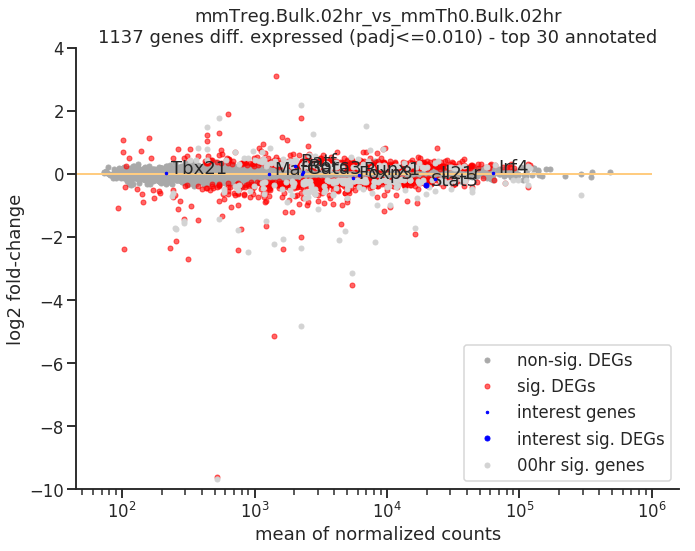

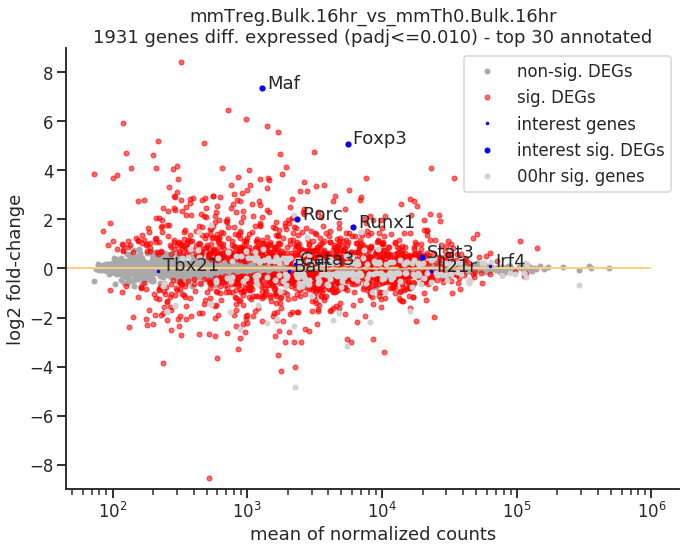

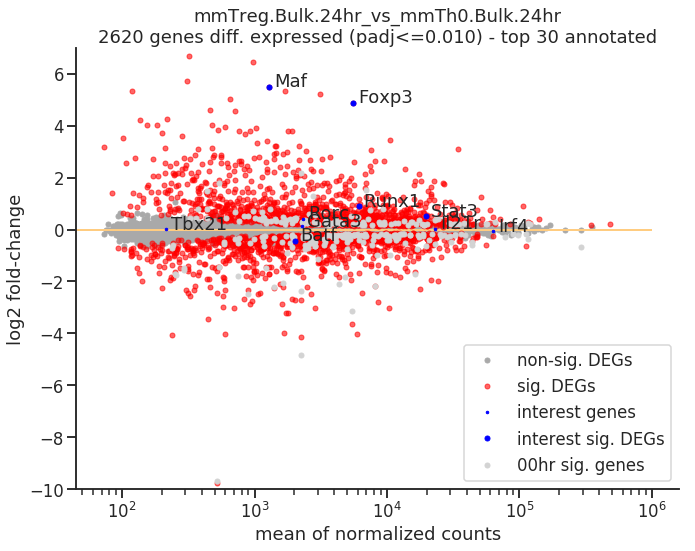

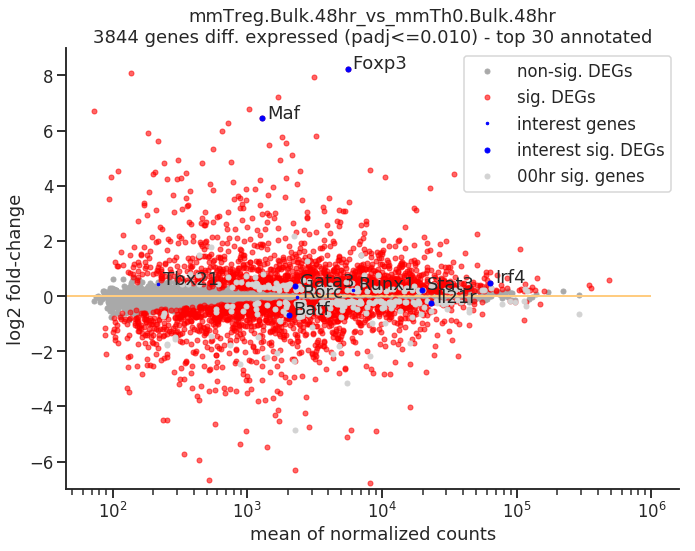

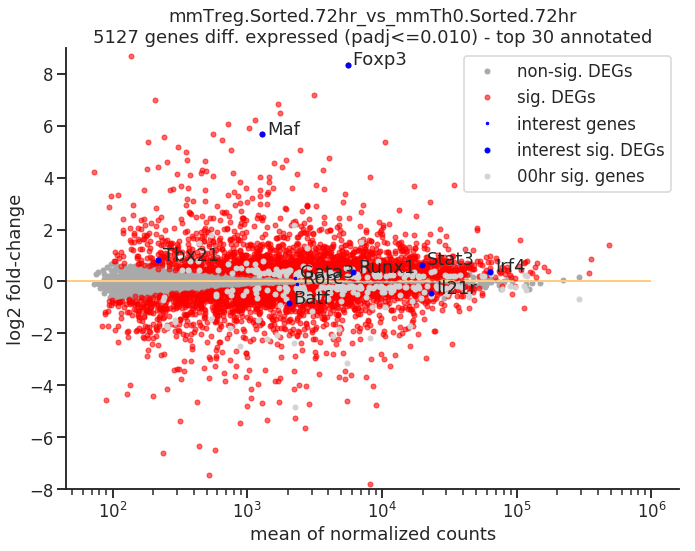

In [24]:
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Config
pval_thres = 0.01
top_to_report = 30

special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3', 'Gata3']
comparisons = [
     'mmTreg.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'mmTreg.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'mmTreg.Bulk.24hr_vs_mmTh0.Bulk.24hr',
     'mmTreg.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr'
]

data_dir = '/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual'

for comparison in comparisons:
    df = pd.read_csv("%s/%s.with_genes.txt" % (data_dir, comparison),
                    sep="\t")
#     df_gene_name_type = pd.read_csv("/data/reddylab/Reference_Data/Refseq/GRCh38/GRCh38_latest_genomic.gene_name_gene_type.txt",
#                     sep="\t",
#                     names=['GeneName', 'GeneType'])
#     df = df.merge(df_gene_name_type, on='GeneName')
#     pseudogene_types = set(df.loc[["pseudogene" in gt for gt in df['GeneType'].values], 'GeneType'].values)
#     df = df[~df.GeneType.isin(pseudogene_types)]
#     df = df[df.GeneType.isin(['protein_coding'])]
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(1, 1, 1)
    df_non_sig = df[~(df.padj<pval_thres) & (~df.GeneName.isin(special_genes))]
    ax.set_xscale('log')
    ax.plot(df_non_sig['baseMean'].values, 
            df_non_sig['log2FoldChange'].values,'o', color='darkgrey', label='non-sig. DEGs', markersize=5, zorder=1)

    
    ylims = [np.ceil(df['log2FoldChange'].min()-1), 
             np.floor(df['log2FoldChange'].max()+1)]
    df_sig = df[df.padj<=pval_thres]
    ax.plot(df_sig['baseMean'].values, df_sig['log2FoldChange'].values,'ro', alpha=0.6, label='sig. DEGs', markersize=5, zorder=2)

    # Annotate the top top_to_report
    df_annotate = df_sig.sort_values(by='padj', ascending=True).head(top_to_report)
    df_annotate_table = df_sig.sort_values(by='padj', ascending=True)

#     if np.count_nonzero(df_annotate['log2FoldChange']>0)==0:
#         df_annotate = pd.concat([df_annotate.head(top_to_report-10), df_sig[df_sig['log2FoldChange']>0].head(10)])
#     ax.plot(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, 'ro', label='sig. DEGs')

#     for x, y, t in zip(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, df_annotate['GeneName'].values) :
#         ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
#                     textcoords='offset points')

    # Annotate in particular IL1RN, HBG and EP300
    df_annotate_selected = df[df.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue', 
            marker='.', linestyle = 'None', alpha=1, label='interest genes', markersize=5, zorder=4)
    for x, y, t in zip(df_annotate_selected['baseMean'].values,
                       df_annotate_selected['log2FoldChange'].values, 
                       df_annotate_selected['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')
    df_annotate_selected = df_sig[df_sig.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue',
            marker='o', linestyle = 'None', alpha=1, label='interest sig. DEGs', markersize=5, zorder=5)
    
    # Annotate those genes that came up in 00hr comparison
    df_00hr = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual/mmTreg.Bulk.00hr_vs_mmTh0.Bulk.00hr.with_genes.sig_DE.txt', sep='\t')
    ax.plot(df_00hr['baseMean'].values, 
            df_00hr['log2FoldChange'].values,color='lightgray', 
            marker='o', linestyle = 'None', alpha=1, label='00hr sig. genes', markersize=5, zorder=3)
    

    plt.ylim(ylims)
    plt.xlabel("mean of normalized counts")
    plt.ylabel("log2 fold-change")
    plt.title("%s\n%d genes diff. expressed (padj<=%.3f) - top %d annotated" % (comparison, 
                                                                                np.count_nonzero(df.padj<=pval_thres), 
                                                                                pval_thres, 
                                                                                top_to_report))
    plt.hlines(0, 0, 1e6, color='#ffcc80', linewidth =2 )
    plt.legend()

    # Remove spines and tight the layout
    simpleaxis(ax)
    plt.tight_layout()
    
#     # Save annotated MA plot
   # plt.savefig("/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/%s.with_genes.annotated_plot_MA.png" % comparison)
    plt.savefig("/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual/%s.with_genes.grayed_00hr.annotated_plot_MA.pdf" % comparison)
     # Save annotated genes without pseudogenes
    # df_annotate_table.to_csv("/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/with_day/%s.with_genes.sig_DE.txt" % comparison, sep='\t', index=False)
    plt.show()
    
    # print table of values 
#     print ("======", comparison, "======")
#     display(df_annotate) 

